/tmp/ipykernel_196/3690809761.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


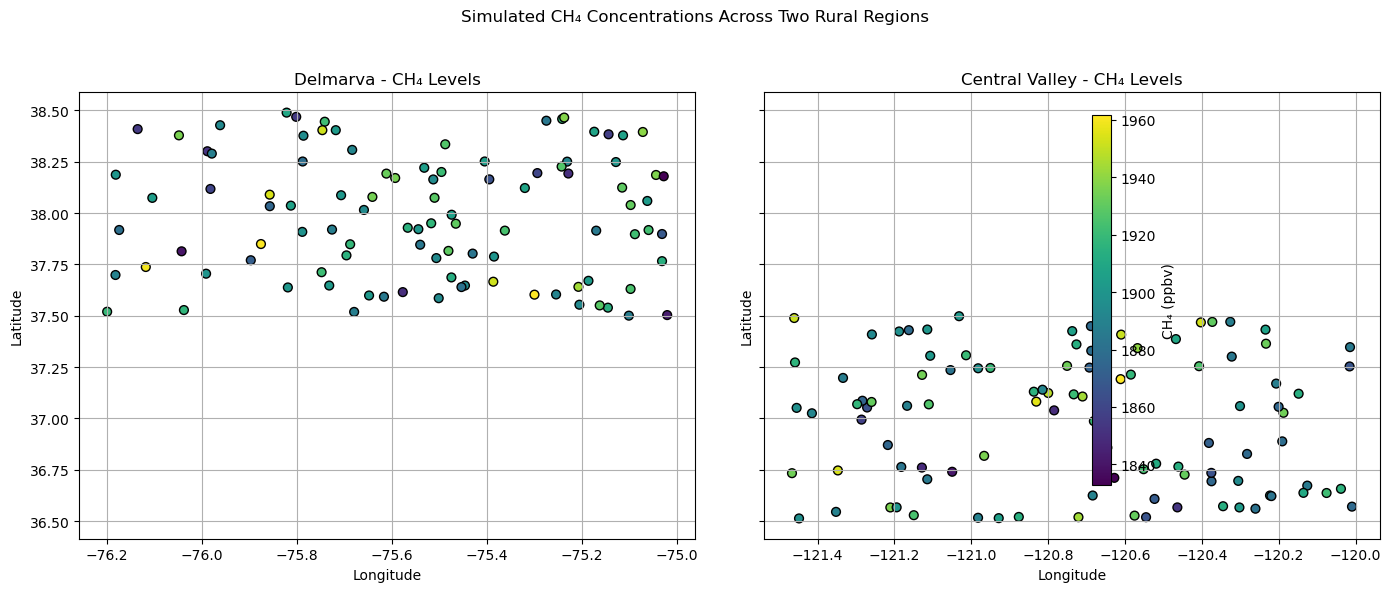

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate flight points for Delmarva and Central Valley
np.random.seed(1)
n_points = 100

regions = ['Delmarva'] * n_points + ['Central Valley'] * n_points
latitudes = np.concatenate([
    np.random.uniform(37.5, 38.5, n_points),   # Delmarva
    np.random.uniform(36.5, 37.5, n_points)    # Central Valley
])
longitudes = np.concatenate([
    np.random.uniform(-76.2, -75.0, n_points),
    np.random.uniform(-121.5, -120.0, n_points)
])
ch4 = np.concatenate([
    np.random.normal(1850, 20, n_points),      # Delmarva CH₄
    np.random.normal(1900, 30, n_points)       # Central Valley CH₄ (higher)
])
nh4 = np.concatenate([
    np.random.normal(2.0, 0.3, n_points),      # Delmarva NH₄
    np.random.normal(3.5, 0.5, n_points)       # Central Valley NH₄ (higher)
])

# Create DataFrame
df = pd.DataFrame({
    "Region": regions,
    "Latitude": latitudes,
    "Longitude": longitudes,
    "CH4": ch4,
    "NH4": nh4
})

# Plot CH₄ scatter by region
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, region in enumerate(['Delmarva', 'Central Valley']):
    subset = df[df['Region'] == region]
    sc = axs[i].scatter(subset['Longitude'], subset['Latitude'], c=subset['CH4'],
                        cmap='viridis', s=40, edgecolor='k')
    axs[i].set_title(f"{region} - CH₄ Levels")
    axs[i].set_xlabel("Longitude")
    axs[i].set_ylabel("Latitude")
    axs[i].grid(True)

cbar = fig.colorbar(sc, ax=axs, orientation='vertical', shrink=0.8)
cbar.set_label("CH₄ (ppbv)")

plt.suptitle("Simulated CH₄ Concentrations Across Two Rural Regions")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
